<a href="https://colab.research.google.com/github/souradipta93/Predictive_Analytics/blob/main/Linear_discriminant_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Core Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=4)
import seaborn as sns
sns.set() 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [ ]:
#Read File
mydata=pd.read_csv("BlueOrRed.csv")
mydata.head() 
 

,Undecided,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,1,51,1,1,1,4,171.0,15,0
1,1,37,1,1,1,3,96.0,18,0
2,1,53,1,1,1,6,86.0,20,0
3,0,33,1,1,1,2,176.0,18,1
4,0,46,1,1,1,6,420.0,15,1


In [ ]:
#Define Predictor Variables
X=mydata.iloc[:,1:9]
X.shape

(10000, 8)

In [ ]:
X.head()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
0,51,1,1,1,4,171.0,15,0
1,37,1,1,1,3,96.0,18,0
2,53,1,1,1,6,86.0,20,0
3,33,1,1,1,2,176.0,18,1
4,46,1,1,1,6,420.0,15,1


In [ ]:
#Define Group Variable
Y=mydata["Undecided"]

In [ ]:
#Descriptive Profiling
mydata.describe() 
mydata.groupby("Undecided").describe().transpose()

Undecided                      0            1
Age           count  5986.000000  4014.000000
              mean     46.910959    48.105132
              std      11.233718    10.874928
              min      18.000000    19.000000
              25%      38.000000    40.000000
              50%      47.000000    48.000000
              75%      54.000000    56.000000
              max      81.000000    80.000000
HomeOwner     count  5986.000000  4014.000000
              mean      0.802038     0.900847
              std       0.398497     0.298905
              min       0.000000     0.000000
              25%       1.000000     1.000000
              50%       1.000000     1.000000
              75%       1.000000     1.000000
              max       1.000000     1.000000
Female        count  5986.000000  4014.000000
              mean      0.731707     0.870703
              std       0.443108     0.335571
              min       0.000000     0.000000
              25%       0.000000     1.000000
              50%       1.000000     1.000000
              75%       1.000000     1.000000
              max       1.000000     1.000000
Married       count  5986.000000  4014.000000
              mean      0.726863     0.779273
              std       0.445608     0.414789
              min       0.000000     0.000000
              25%       0.000000     1.000000
              50%       1.000000     1.000000
...                          ...          ...
HouseholdSize std       1.552389     1.572592
              min       1.000000     1.000000
              25%       2.000000     2.000000
              50%       3.000000     3.000000
              75%       4.000000     5.000000
              max       7.000000     7.000000
Income        count  5986.000000  4014.000000
              mean    107.522787    90.944569
              std      86.321683    48.615941
              min       4.000000     4.000000
              25%      49.000000    56.000000
              50%      88.000000    88.000000
              75%     141.000000   125.000000
              max     549.000000   474.000000
Education     count  5986.000000  4014.000000
              mean     14.050618    16.623069
              std       4.839231     2.422417
              min       8.000000     8.000000
              25%       8.000000    15.000000
              50%      15.000000    16.000000
              75%      18.000000    18.000000
              max      20.000000    20.000000
Church        count  5986.000000  4014.000000
              mean      0.631139     0.309417
              std       0.482536     0.462311
              min       0.000000     0.000000
              25%       0.000000     0.000000
              50%       1.000000     0.000000
              75%       1.000000     1.000000
              max       1.000000     1.000000

[64 rows x 2 columns]

In [ ]:
#Split the data into Train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
X_train.shape

(7000, 8)

In [ ]:
#Build the Model for Train Data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
X_train_lda=lda.fit_transform(X_train,Y_train)
VarianceExplained=lda.explained_variance_ratio_
print(VarianceExplained)
Model=lda.fit(X_train,Y_train)


[1.]


In [ ]:
 Model.get_params(deep=True)

{'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [ ]:
#Fisher's Coeffcients for the Discriminant Model
Coef=Model.coef_
Coef=pd.DataFrame(Coef).transpose()
Coef.columns=["Fisher Z="]
Result=Coef.transpose()
Result.columns=["Age","HomeOwner","Female","Married","HouseholdSize","Income","Education","Church"]
Result

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church
Fisher Z=,-0.007583,0.478553,1.142757,0.132412,0.170898,-0.005829,0.198567,-1.746401


In [ ]:
#Obtaining Discriminant Scores
Scores=Model.decision_function(X_train)
Scores=pd.DataFrame(Scores)
Scores.columns=["ZScore"]
Scores

,ZScore
0,-1.021447
1,1.454896
2,0.306876
3,-0.376283
4,0.026747
5,-0.737483
6,-0.837454
7,-0.606419
8,-0.275436
9,-1.584484


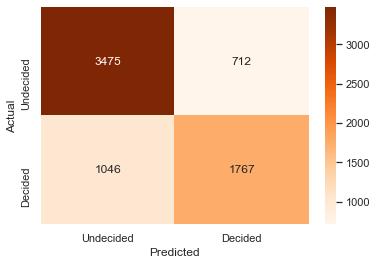

In [ ]:
#Posterior Probabilities and Confusion Matrix
Posterior=(Model.predict_proba(X_train))
Posterior=pd.DataFrame(Posterior)
Posterior.head()
pred_class=(Posterior[1]>0.5).astype(np.int)
pred_class.value_counts()
confusion=confusion_matrix(Y_train.astype(float),pred_class)
sns.heatmap(confusion,annot=True,cmap="Oranges",
            xticklabels=["Undecided","Decided"],
            yticklabels=["Undecided","Decided"],fmt="0.0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
#Computing Accuracy, Recall, and Precision for the training data
from sklearn.metrics import accuracy_score,recall_score,precision_score
print("Accuracy=","{0:.4f}".format(accuracy_score(Y_train,pred_class)))
print("Recall=","{0:.4f}".format(recall_score(Y_train,pred_class)))
print("Precision=","{0:.4f}".format(precision_score(Y_train,pred_class)))

Accuracy= 0.7489
Recall= 0.6282
Precision= 0.7128


                 ZScore       Age  HomeOwner    Female   Married  \
ZScore         1.000000  0.007793   0.002915  0.004780 -0.008704   
Age            0.007793  1.000000   0.019706 -0.030038 -0.050663   
HomeOwner      0.002915  0.019706   1.000000  0.020501  0.084496   
Female         0.004780 -0.030038   0.020501  1.000000  0.003540   
Married       -0.008704 -0.050663   0.084496  0.003540  1.000000   
HouseholdSize -0.005323 -0.131152   0.051778  0.018748  0.479347   
Income        -0.001417 -0.119671   0.080007 -0.006404  0.245220   
Education     -0.018000  0.283178   0.242779 -0.015182  0.052426   
Church         0.006907 -0.016718   0.006392  0.004767 -0.002053   

               HouseholdSize    Income  Education    Church  
ZScore             -0.005323 -0.001417  -0.018000  0.006907  
Age                -0.131152 -0.119671   0.283178 -0.016718  
HomeOwner           0.051778  0.080007   0.242779  0.006392  
Female              0.018748 -0.006404  -0.015182  0.004767  
Married  

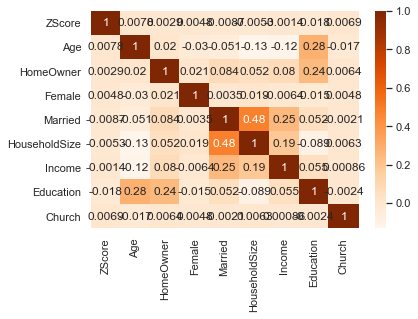

In [ ]:
#Relative Importance of Predictor Variables
Data=[Scores.ZScore,mydata.Age,mydata.HomeOwner,mydata.Female,mydata.Married,mydata.HouseholdSize,mydata.Income,
      mydata.Education,mydata.Church]
Data=pd.DataFrame(Data).transpose()
CorMatrix=Data[Data.columns].corr()
print(CorMatrix)
CorMatrix=pd.DataFrame(CorMatrix)
CorMatrix
sns.heatmap(CorMatrix,annot=True,cmap="Oranges") 

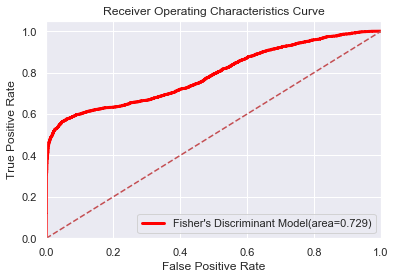

In [ ]:
#ROC Curve for the Model 
from sklearn.metrics import roc_auc_score,roc_curve
disroc=roc_auc_score(Y_train.astype(float),pred_class)
fpr,tpr,thresholds=roc_curve(Y_train.astype(float),Posterior[1],drop_intermediate=False)
plt.figure()
plt.plot(fpr,tpr,lw=3,color="Red",label="Fisher's Discriminant Model(area=%0.3f)" %disroc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics Curve")
plt.legend(loc="lower right")
plt.show()

[[1527  272]
 [ 458  743]]


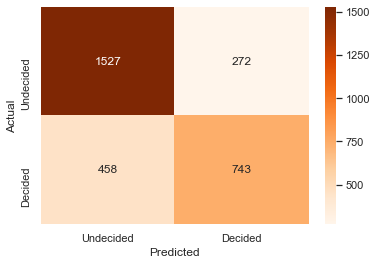

In [ ]:
# Model Performance for Test Data
Prediction=Model.predict(X_test)
Prediction
confusion=confusion_matrix(Y_test,Prediction)
print(confusion)
sns.heatmap(confusion,annot=True,fmt=".0f",cmap="Oranges",
           xticklabels=["Undecided","Decided"],
           yticklabels=["Undecided","Decided"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
#Computing Accuracy, Recall,and Precision
from sklearn.metrics import accuracy_score,recall_score,precision_score
print("Accuracy=","{0:.4f}".format(accuracy_score(Y_test,Prediction)))
print("Recall=","{0:.4f}".format(recall_score(Y_test,Prediction)))
print("Precision=","{0:.4f}".format(precision_score(Y_test,Prediction)))

Accuracy= 0.7567
Recall= 0.6187
Precision= 0.7320
